# Solutions for pandas exercises

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Tips

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips

In [ ]:
replace = {"Thur": "Thursday", "Sun": "Sunday", "Sat": "Saturday", "Fri": "Friday"}
tips["day"] = tips["day"].replace(replace)

In [ ]:
sns.relplot(x="tip", y="total_bill", data=tips, markers=True, style="day",
            hue="day", col="sex")

In [ ]:
tips["day"] = tips["day"].astype("category")
sns.relplot(x="total_bill", y="tip", hue="day", style="sex", data=tips)

In [ ]:
plt.savefig("../output/tips.pdf")

## Occupations

In [3]:
FNAME = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
df = pd.read_csv(FNAME, sep="|")

In [4]:
df = df.set_index("user_id")

In [5]:
print(df.tail(10))
print(df.head(25))

         age gender     occupation zip_code
user_id                                    
934       61      M       engineer    22902
935       42      M         doctor    66221
936       24      M          other    32789
937       48      M       educator    98072
938       38      F     technician    55038
939       26      F        student    33319
940       32      M  administrator    02215
941       20      M        student    97229
942       48      F      librarian    78209
943       22      M        student    77841
         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
6         42      M      executive    98101
7         57      M  administrator    91344
8         36      M  administrator    05201
9         29      M        stude

In [6]:
print(df.info()) ## df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB
None


In [7]:
counts = df["age"].value_counts()
min_value = counts.min()
print(counts[counts == min_value].index)

Int64Index([7, 66, 11, 10, 73], dtype='int64')


In [8]:
occ_counts = df["occupation"].value_counts()

In [9]:
type(occ_counts)

pandas.core.series.Series

In [10]:
print(occ_counts.shape)
print(occ_counts[0])

(21,)
196


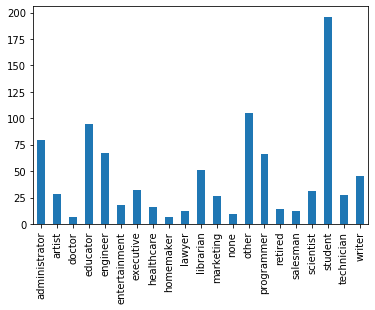

In [11]:
occ_counts = occ_counts.sort_index()
fig, ax = plt.subplots()
occ_counts.plot.bar(ax=ax)

In [ ]:
fig.savefig("../output/occupations.pdf")

## Euro 2012

In [ ]:
df = pd.read_csv("../data/Euro_2012.csv", index_col='Team')

In [ ]:
print(df.index.nunique())
print(df.sort_values("Shooting Accuracy", ascending=False).index[0])

In [ ]:
print(df.loc["England"]["Penalty goals"])
print(df.loc[["England", "Italy", "Russia"]]["Shooting Accuracy"])

In [ ]:
df.info()

In [ ]:
df[["Saves-to-shots ratio", "Passing Accuracy", "Shooting Accuracy", "% Goals-to-shots"]].head()

In [ ]:
df.info()

In [ ]:
non_numeric_cols = ['Shooting Accuracy', 'Passing Accuracy', '% Goals-to-shots']
for col in non_numeric_cols:
    df[col] = df[col].str.replace("%", "").astype(float)

In [ ]:
df.plot(x='Shooting Accuracy', y='Passing Accuracy', kind="scatter")

In [ ]:
df.sort_values("Shots on target", ascending=False).index[1]

In [ ]:
df.drop("Italy").sort_values("Shots on target", ascending=False).index[1]

In [ ]:
discipline = df[["Yellow Cards", "Red Cards"]]
discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
discipline.to_csv("./output/discipline.tsv", sep="\t")

## Alcohol

In [ ]:
df = pd.read_csv("../data/drinks.csv")
df.head()

In [ ]:
grouped = df.groupby(["continent"])
cols = ["beer_servings", "wine_servings"]
grouped[cols].mean().sort_values(cols, ascending=False).index[0]

In [ ]:
new = df.melt(id_vars="continent", var_name="type",
              value_vars=["beer_servings", "spirit_servings", "wine_servings"],
              value_name="consumption")
sns.catplot(x="continent", y="consumption", col="type", data=new)

In [ ]:
plt.savefig("../output/alcohol.pdf")

## Iris

In [3]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [4]:
iris.columns = ['sepal length (in cm)', 'sepal width (in cm)', 'petal length (in cm)', 'petal width (in cm)', 'class']

In [5]:
from numpy import nan

In [6]:
iris.loc[10:30, 'petal length (in cm)'] = nan

In [7]:
iris['petal length (in cm)'].isna().sum()

21

In [8]:
iris = iris.fillna(1.0)

In [14]:
iris.to_csv('../output/iris.csv', index=False)

In [15]:
iris.head()

,sepal length (in cm),sepal width (in cm),petal length (in cm),petal width (in cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


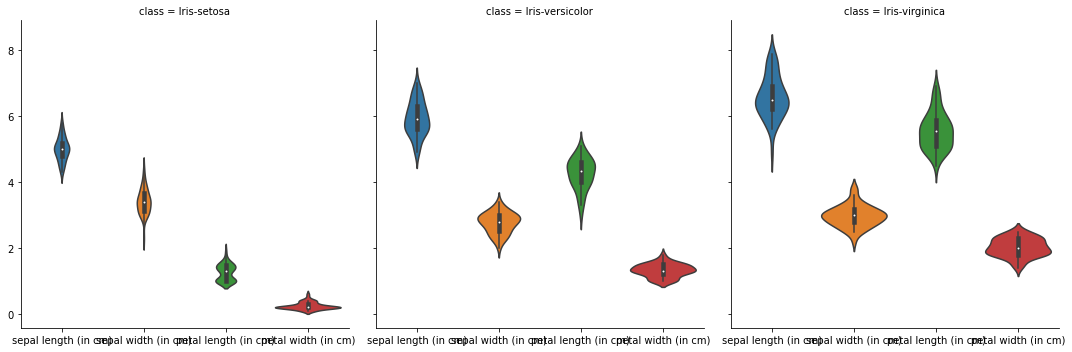

In [18]:
count = iris.select_dtypes("float")
sns.catplot(data = iris,
            col = "class",
            kind = "violin")
#fig.savefig('../output/iris.pdf')

## Memory

In [ ]:
df = pd.read_csv("https://query.data.world/s/wsjbxdqhw6z6izgdxijv5p2lfqh7gx")

In [ ]:
print(df.info())
print(df.info(memory_usage="deep"))

In [ ]:
df_copy = df.copy().select_dtypes(include=[object])

In [ ]:
df_copy.describe()

In [ ]:
CUTOFF = 0.49*df.shape[0]
few_unique = [col for col in df_copy.columns if df_copy[col].nunique() <= CUTOFF]

In [ ]:
for col in few_unique:
    df[col] = df[col].astype('category')

In [ ]:
print(df.info(memory_usage="deep"))

In [ ]:
df["v_line_score"] = df["v_line_score"].astype(str)  # temporary fix because of bug https://issues.apache.org/jira/browse/ARROW-14087

In [ ]:
df.to_csv("../output/large_file.csv")
df.to_feather("../output/large_file.ftr")